# <span style="color:DarkOrange">Machine Learning Project</span> using <span style="color:DarkOrange">KNN, SVM</span>

----
Made by <span style="color:DarkOrange"> Yaniv Ioffik</span> in <span style="color:DarkOrange">May, 2022</span>.<br /><br />
This project is about developing machine knowledge to be able to predict whether an object in space that orbits our sun is a planet.<br />

<span style="color:DarkOrange">Solar System - Major Bodies Dataset: </span>https://www.kaggle.com/jaredsavage/solar-system-major-bodies-data.

----
![](solar-system.png "Project Image")

----
## <span style="color:DarkOrange">Importing Libraries</span>
---

In [1]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In [2]:
# FANCY OUTPUTS
RED = '\033[91m'
GREEN = '\033[92m'
WHITE = '\033[0m'

----
## <span style="color:DarkOrange">Exploratory Data Analysis</span>
---

In [3]:
# Read the dataset.
df = pd.read_csv("sol_data.csv")

# Display all columns of the DataFrame.
pd.set_option('display.max_columns', None)

# Show the DataFrame.
df

,eName,isPlanet,semimajorAxis,perihelion,aphelion,eccentricity,inclination,density,gravity,escape,meanRadius,equaRadius,polarRadius,flattening,dimension,sideralOrbit,sideralRotation,discoveryDate,mass_kg,volume,orbit_type,orbits,bondAlbido,geomAlbido,RV_abs,p_transit,transit_visibility,transit_depth,massj,semimajorAxis_AU,grav_int
0,Moon,False,384400,363300,405500,0.0549,5.145,3.344,1.6200,2380.000,33.0,1738.1,1736.0,0.0012,NaN,27.32170,655.72800,NaN,7.350000e+22,2.196800e+10,Secondary,Earth,NaN,NaN,NaN,1.811589,326.086108,2.245860e-09,3.868421e-05,0.002570,6.606324e+25
1,Phobos,False,9376,9234,9518,0.0151,1.075,1.900,0.0057,11.390,33.0,13.0,9.1,0.0000,26.8 x 22.4 x 18.4,0.31891,0.76530,12/08/1877,1.060000e+16,5.783610e+03,Secondary,Mars,NaN,NaN,NaN,74.272078,13368.973976,2.245860e-09,5.578947e-12,0.000063,1.601437e+22
2,Deimos,False,23458,23456,23471,0.0002,1.075,1.750,0.0030,5.556,33.0,7.8,5.1,0.0000,15.0 x 12 x 10.4,1.26244,30.29856,12/08/1877,2.400000e+15,9.997800e+03,Secondary,Mars,NaN,NaN,NaN,29.686035,5343.486231,2.245860e-09,1.263158e-12,0.000157,5.792534e+20
3,Io,False,421800,0,0,0.0040,0.036,3.530,1.7900,0.000,1821.5,0.0,0.0,0.0000,NaN,1.76914,42.45930,07/01/1610,8.930000e+22,NaN,Secondary,Jupiter,NaN,NaN,NaN,1.655200,297.936060,6.842474e-06,4.700000e-05,0.002820,6.666188e+25
4,Europa,False,671100,0,0,0.0090,0.466,3.010,1.3100,0.000,1560.8,0.0,0.0,0.0000,NaN,3.55118,85.22930,08/01/1610,4.800000e+22,NaN,Secondary,Jupiter,NaN,NaN,NaN,1.039939,187.188949,5.023997e-06,2.526316e-05,0.004486,1.415487e+25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,S/2017 J 8,False,23233000,0,0,0.3120,164.700,1.000,0.0000,0.000,0.5,0.0,0.0,0.0000,NaN,720.00000,0.00000,17/07/2018,2.400000e+16,NaN,Secondary,Jupiter,NaN,NaN,NaN,0.029972,5.394983,5.155785e-13,1.263158e-11,0.155303,5.905272e+15
261,S/2017 J 9,False,21487000,0,0,0.2290,152.700,1.000,0.0000,0.000,1.5,0.0,0.0,0.0000,NaN,639.00000,0.00000,17/07/2018,2.400000e+16,NaN,Secondary,Jupiter,NaN,NaN,NaN,0.032408,5.833380,4.640207e-12,1.263158e-11,0.143632,6.903971e+15
262,Ersa,False,11483000,0,0,0.0940,30.600,1.000,0.0000,0.000,1.5,0.0,0.0,0.0000,NaN,252.00000,0.00000,17/07/2018,2.400000e+16,NaN,Secondary,Jupiter,NaN,NaN,NaN,0.060641,10.915425,4.640207e-12,1.263158e-11,0.076759,2.417351e+16
263,Ultima Thule,False,6633400000,0,0,0.0000,0.000,1.000,0.0000,0.000,33.0,0.0,0.0,0.0000,39x37x25,2.74000,0.00000,26/06/2014,2.400000e+16,NaN,Primary,NaN,NaN,NaN,NaN,0.000105,0.018896,2.245860e-09,1.263158e-11,44.341540,7.243995e+10


----
## <span style="color:DarkOrange">DataFrame Columns Explanations</span>
---

-<span style="color:DarkOrange"> **eName**</span>: The name of the object **(Object)**.<br>
-<span style="color:DarkOrange"> **isPlanet**</span>: Is the object a planet **(True / False)**.<br>
-<span style="color:DarkOrange"> **semimajorAxis**</span>: Average orbital distance in kilometers **(108 - 152000000000)**.<br>
-<span style="color:DarkOrange"> **perihelion**</span>: Closest distance to the sun during its orbit **(0 - 2147483647)**.<br>
-<span style="color:DarkOrange"> **aphelion**</span>: Furthest distance from the sun during its orbit **(0 - 2147483647)**.<br>
-<span style="color:DarkOrange"> **eccentricity**</span>: Ratio of perihelion to aphelion **(0.0 - 0.7512)**.<br>
-<span style="color:DarkOrange"> **inclination**</span>: Difference in angle between body's orbit and the sun **(0.0 - 179.8)**.<br>
-<span style="color:DarkOrange"> **density**</span>: Average density of the body **(0.34 - 5.5136)**.<br>
-<span style="color:DarkOrange"> **gravity**</span>: Surface gravity, measures in m/s^2 **(0.0 - 24.79)**.<br>
-<span style="color:DarkOrange"> **escape**</span>: Escape velocity at surface level **(0.0 - 60200.0)**.<br>
-<span style="color:DarkOrange"> **meanRadius**</span>: Average total radius **(0.3 - 69911.0)**.<br>
-<span style="color:DarkOrange"> **equaRadius**</span>: Average equatorial radius **(0.0 - 71492.0)**.<br>
-<span style="color:DarkOrange"> **polarRadius**</span>: Average polar radius **(0.0 - 66854.0)**.<br>
-<span style="color:DarkOrange"> **flattening**</span>: Ratio of equatorial radius to polar radius **(0.0 - 0.9619)**.<br>
-<span style="color:DarkOrange"> **dimension**</span>: Approximate spatial dimensions of irregular shaped objects **(Object)**.<br>
-<span style="color:DarkOrange"> **sideralOrbit**</span>: Orbital period in Earth days **(-2823.4 - 203830.0)**.<br>
-<span style="color:DarkOrange"> **sideralRotation**</span>: Rotational period in hours **(-5832.5 - 1735.92)**.<br>
-<span style="color:DarkOrange"> **discoveryDate**</span>: Date of discovery, this is left blank for any objects that were known since antiquity **(Object)**.<br>
-<span style="color:DarkOrange"> **mass_kg**</span>: Total estimated mass of object in kg **(100000000000.0 - 1.9e+27)**.<br>
-<span style="color:DarkOrange"> **volume**</span>: Approximate volume in km^3 **(NaN / 9.997800e+03)**.<br>
-<span style="color:DarkOrange"> **orbit_type**</span>: Orbits the sun or orbits a planet **(Primary / Secondary)**.<br>
-<span style="color:DarkOrange"> **orbits**</span>: The planet that the body orbits. If it does not orbit a planet then it is NA. **(Object)**<br>
-<span style="color:DarkOrange"> **bondAlbido**</span>: Bond albedo, portion of light/energy that gets reflected by the surface **(NaN)**.<br>
-<span style="color:DarkOrange"> **geomAlbido**</span>: Geometric albedo, modified reflective metric for spherical objects which, because of opposition effects, can be greater than 1 **(NaN)**.<br>
-<span style="color:DarkOrange"> **RV_abs**</span>: Radial velocity of the sun due to object's gravitational pull **(NaN)**.<br>
-<span style="color:DarkOrange"> **p_transit**</span>: Probability that a transit will be observable **(4.5814144736842105e-06 - 6447.916666666667)**.<br>
-<span style="color:DarkOrange"> **transit_visibility**</span>: Angle from the ecliptic that a transit will be visible **(0.0008246546052631579 - 1160625.0)**.<br>
-<span style="color:DarkOrange"> **transit_depth**</span>: Portion of Sun's energy that is blocked during transit **(1.85608272381447e-13 - 0.0100796591755371)**.<br>
-<span style="color:DarkOrange"> **massj**</span>: Mass compared to Jupiter **(5.2631578947368417e-17 - 1.0)**.<br>
-<span style="color:DarkOrange"> **semimajorAxis_AU**</span>: Orbital radius in Astronomical Units **(7.219354092049922e-07 - 1016.0572425848038)**.<br>
-<span style="color:DarkOrange"> **grav_int**</span>: Gravitational interaction with the sun **(137963227.14681438 - 2.732769547325103e+26)**.<br>

In [4]:
# Calculate statistical data of the DataFrame and transpose the DataFrame's rows and columns.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
semimajorAxis,265.0,1.330740e+09,1.048573e+10,0.000000e+00,2.946720e+05,2.015529e+07,2.392800e+07,1.520000e+11
perihelion,265.0,5.999915e+07,3.332062e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.147484e+09
aphelion,265.0,6.149610e+07,3.365186e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.147484e+09
eccentricity,265.0,1.472165e-01,1.708205e-01,0.000000e+00,0.000000e+00,5.650000e-02,2.590000e-01,7.512000e-01
inclination,265.0,6.437249e+01,7.454601e+01,0.000000e+00,0.000000e+00,5.145000e+00,1.507000e+02,1.798000e+02
density,265.0,1.144789e+00,6.117393e-01,3.400000e-01,1.000000e+00,1.000000e+00,1.000000e+00,5.513600e+00
gravity,265.0,1.383590e+00,1.693467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.740000e+02
escape,265.0,3.004400e+03,3.816443e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.170000e+05
meanRadius,265.0,3.481592e+03,4.314101e+04,3.000000e-01,2.700000e+00,2.700000e+01,3.300000e+01,6.963420e+05
equaRadius,265.0,7.718070e+02,6.139792e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.149200e+04


In [5]:
# Show information about the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   eName               265 non-null    object 
 1   isPlanet            265 non-null    bool   
 2   semimajorAxis       265 non-null    int64  
 3   perihelion          265 non-null    int64  
 4   aphelion            265 non-null    int64  
 5   eccentricity        265 non-null    float64
 6   inclination         265 non-null    float64
 7   density             265 non-null    float64
 8   gravity             265 non-null    float64
 9   escape              265 non-null    float64
 10  meanRadius          265 non-null    float64
 11  equaRadius          265 non-null    float64
 12  polarRadius         265 non-null    float64
 13  flattening          265 non-null    float64
 14  dimension           92 non-null     object 
 15  sideralOrbit        265 non-null    float64
 16  sideralR

In [6]:
# Show the number of unique values for each column.
df.nunique()

eName                 265
isPlanet                2
semimajorAxis         262
perihelion             34
aphelion               34
eccentricity          155
inclination           159
density                46
gravity                43
escape                 18
meanRadius             81
equaRadius             15
polarRadius            16
flattening             11
dimension              28
sideralOrbit          190
sideralRotation        41
discoveryDate         156
mass_kg               114
volume                 17
orbit_type              2
orbits                 16
bondAlbido              8
geomAlbido             13
RV_abs                 13
p_transit             262
transit_visibility    262
transit_depth          81
massj                 114
semimajorAxis_AU      262
grav_int              263
dtype: int64

In [7]:
# Show the number of unique values for each column that contains an object.
df.select_dtypes(include = "object").nunique()

eName            265
dimension         28
discoveryDate    156
orbit_type         2
orbits            16
dtype: int64

In [8]:
# Display my color pallete.
sns.color_palette("hls")

[(0.86, 0.3712, 0.33999999999999997),
 (0.8287999999999999, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.3712),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.3712, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.8287999999999999)]

Text(0.5, 1.0, 'Amount of planets and not planets.')

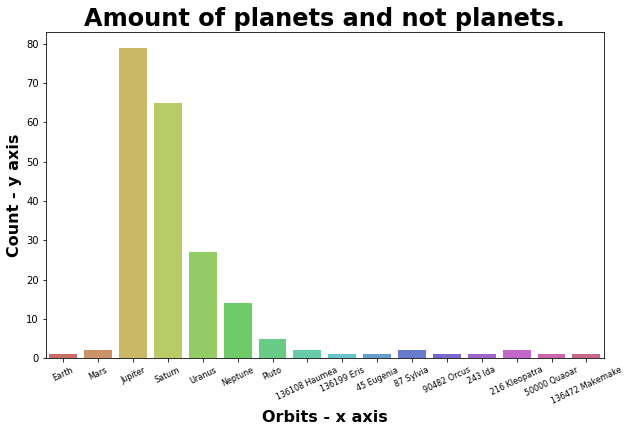

In [9]:
# Specify the width and height of the plot.
plt.figure(figsize = (10, 6))

# Create a 'count' plot.
ax = sns.countplot(x = "orbits", data = df, palette = "hls")

# Set the x axis labels to be smaller and to rotate by 25 degrees.
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 8, rotation = 25)

# Name the labels of the x, y axes.
plt.xlabel("Orbits - x axis", fontsize = 16, fontweight = "bold")
plt.ylabel("Count - y axis", fontsize = 16, fontweight = "bold")

# Give the plot a title.
plt.title("Amount of planets and not planets.", fontsize = 24, fontweight = "bold")

Text(0.5, 1.0, 'Amount of planets and not planets.')

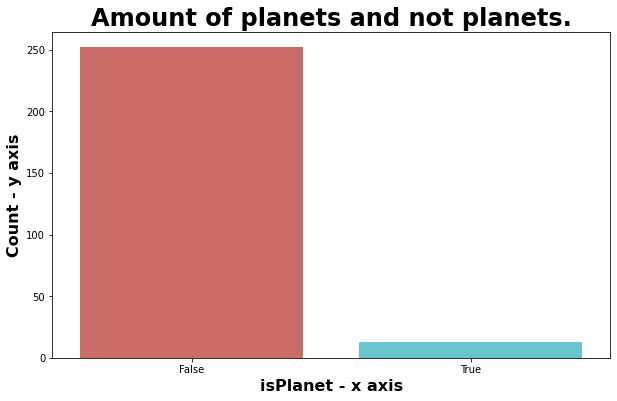

In [10]:
# Specify the width and height of the plot.
plt.figure(figsize = (10, 6))

# Create a 'count' plot.
sns.countplot(x = "isPlanet", data = df, palette = "hls")

# Name the labels of the x, y axes.
plt.xlabel("isPlanet - x axis", fontsize = 16, fontweight = "bold")
plt.ylabel("Count - y axis", fontsize = 16, fontweight = "bold")

# Give the plot a title.
plt.title("Amount of planets and not planets.", fontsize = 24, fontweight = "bold")

Text(0.5, 1.0, 'Body mass comparison between\nplanets and not planets.')

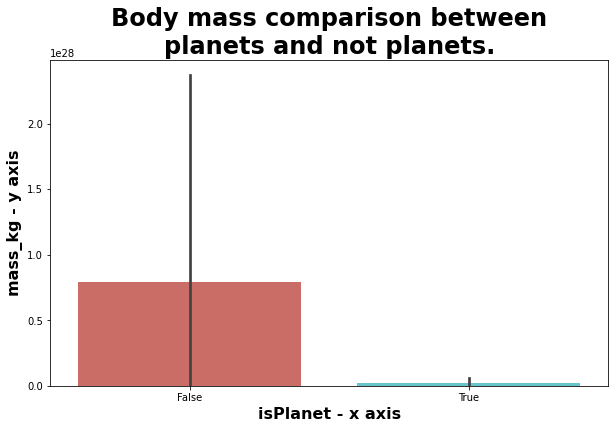

In [11]:
# Specify the width and height of the plot.
plt.figure(figsize = (10, 6))

# Create a 'bar' plot.
sns.barplot(x = "isPlanet", y = "mass_kg", data = df, palette = "hls")

# Name the labels of the x, y axes.
plt.xlabel("isPlanet - x axis", fontsize = 16, fontweight = "bold")
plt.ylabel("mass_kg - y axis", fontsize = 16, fontweight = "bold")

# Give the plot a title.
plt.title("Body mass comparison between\nplanets and not planets.", fontsize=24, fontweight="bold")


Text(0.5, 1.0, 'Represent each value in the\ndata set by a dot.')

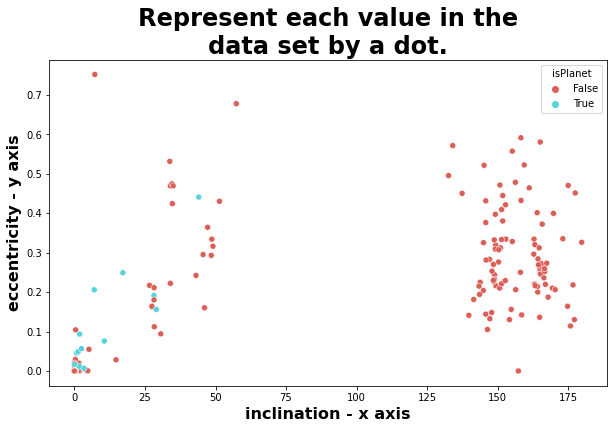

In [12]:
# Specify the width and height of the plot.
plt.figure(figsize = (10, 6))

# Create a 'scatter' plot.
sns.scatterplot(x = "inclination", y = 'eccentricity', hue = 'isPlanet', data = df, palette = "hls")

# Name the labels of the x, y axes.
plt.xlabel("inclination - x axis", fontsize = 16, fontweight = "bold")
plt.ylabel("eccentricity - y axis", fontsize = 16, fontweight = "bold")

# Give the plot a title.
plt.title("Represent each value in the\ndata set by a dot.", fontsize = 24, fontweight = "bold")

Text(0.5, 1.0, 'Represent each value in the\ndata set by a dot.')

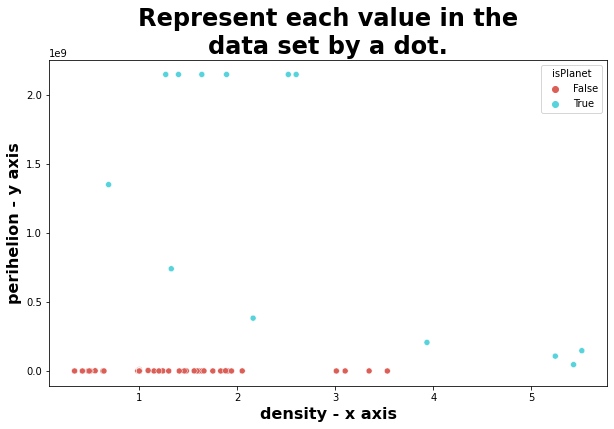

In [13]:
# Specify the width and height of the plot.
plt.figure(figsize = (10, 6))

# Create a 'scatter' plot.
sns.scatterplot(x = "density", y = 'perihelion', hue = 'isPlanet', data = df, palette = "hls")

# Name the labels of the x, y axes.
plt.xlabel("density - x axis", fontsize = 16, fontweight = "bold")
plt.ylabel("perihelion - y axis", fontsize = 16, fontweight = "bold")

# Give the plot a title.
plt.title("Represent each value in the\ndata set by a dot.", fontsize = 24, fontweight = "bold")

Text(0.5, 1.0, 'Display all planets by its discovery date.')

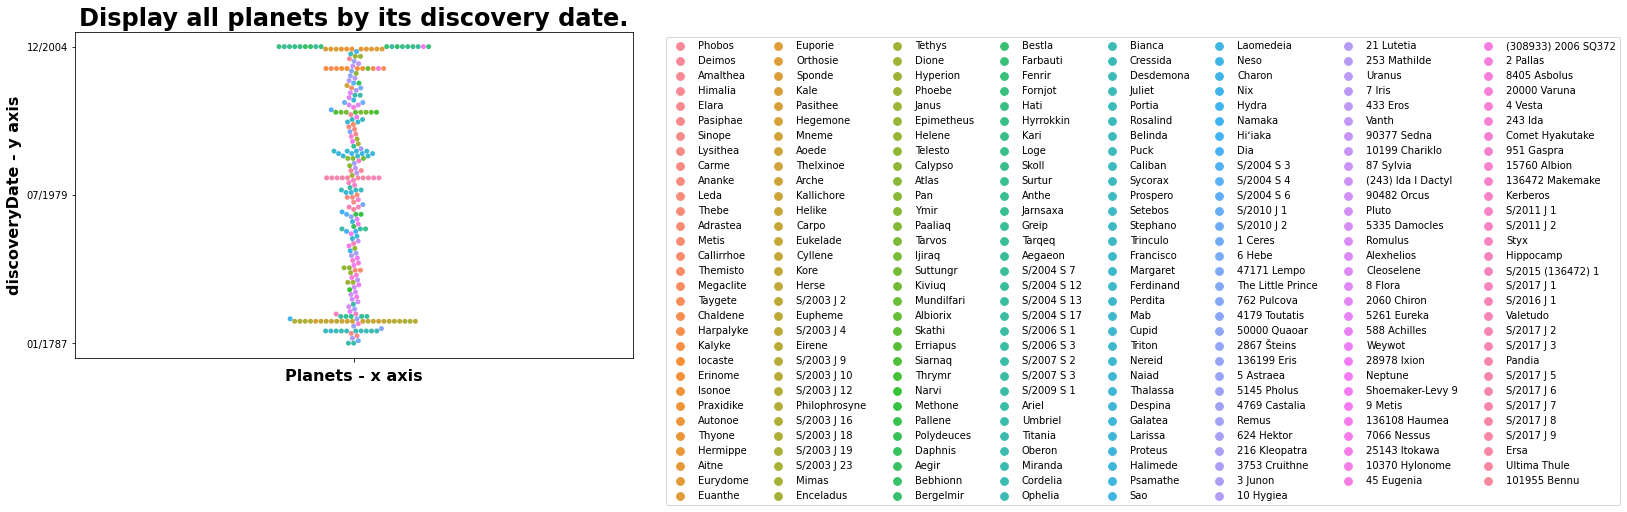

In [14]:
# Convert string Date time into Python datetime object & replace non-numeric values with NaN.
df['discoveryDate'] = pd.to_datetime(df['discoveryDate'], dayfirst = True, errors = 'coerce')
# Convert Python datetime object into a string with the format of month/year & remove all NaN occurrences.
df['discoveryDate'] = df['discoveryDate'].dt.strftime("%m/%Y").dropna()

# Store name of object and its discovery date in data & remove all NaN occurrences.
data = df[['eName', 'discoveryDate']].dropna()

# Specify the width and height of the plot.
plt.figure(figsize = (10, 6))

# Create a 'swarm' plot.
plot = sns.swarmplot(y = data['discoveryDate'], hue = data['eName'], x = [""] * len(data))

# Specify the coordinates, location and amount of columns of the legend.
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left', ncol = 8)

# plot.get_yticks() length is 123, so take three ticks by jumps of 61.
plot.set_yticks(plot.get_yticks()[::61])

# Name the labels of the x, y axes.
plt.xlabel("Planets - x axis", fontsize = 16, fontweight = "bold")
plt.ylabel("discoveryDate - y axis", fontsize = 16, fontweight = "bold")

# Give the plot a title.
plt.title("Display all planets by its discovery date.", fontsize = 24, fontweight = "bold")

----
## <span style="color:DarkOrange">Data Cleaning</span>
---

In [15]:
# Show the DataFrame.
df

,eName,isPlanet,semimajorAxis,perihelion,aphelion,eccentricity,inclination,density,gravity,escape,meanRadius,equaRadius,polarRadius,flattening,dimension,sideralOrbit,sideralRotation,discoveryDate,mass_kg,volume,orbit_type,orbits,bondAlbido,geomAlbido,RV_abs,p_transit,transit_visibility,transit_depth,massj,semimajorAxis_AU,grav_int
0,Moon,False,384400,363300,405500,0.0549,5.145,3.344,1.6200,2380.000,33.0,1738.1,1736.0,0.0012,NaN,27.32170,655.72800,NaN,7.350000e+22,2.196800e+10,Secondary,Earth,NaN,NaN,NaN,1.811589,326.086108,2.245860e-09,3.868421e-05,0.002570,6.606324e+25
1,Phobos,False,9376,9234,9518,0.0151,1.075,1.900,0.0057,11.390,33.0,13.0,9.1,0.0000,26.8 x 22.4 x 18.4,0.31891,0.76530,08/1877,1.060000e+16,5.783610e+03,Secondary,Mars,NaN,NaN,NaN,74.272078,13368.973976,2.245860e-09,5.578947e-12,0.000063,1.601437e+22
2,Deimos,False,23458,23456,23471,0.0002,1.075,1.750,0.0030,5.556,33.0,7.8,5.1,0.0000,15.0 x 12 x 10.4,1.26244,30.29856,08/1877,2.400000e+15,9.997800e+03,Secondary,Mars,NaN,NaN,NaN,29.686035,5343.486231,2.245860e-09,1.263158e-12,0.000157,5.792534e+20
3,Io,False,421800,0,0,0.0040,0.036,3.530,1.7900,0.000,1821.5,0.0,0.0,0.0000,NaN,1.76914,42.45930,NaN,8.930000e+22,NaN,Secondary,Jupiter,NaN,NaN,NaN,1.655200,297.936060,6.842474e-06,4.700000e-05,0.002820,6.666188e+25
4,Europa,False,671100,0,0,0.0090,0.466,3.010,1.3100,0.000,1560.8,0.0,0.0,0.0000,NaN,3.55118,85.22930,NaN,4.800000e+22,NaN,Secondary,Jupiter,NaN,NaN,NaN,1.039939,187.188949,5.023997e-06,2.526316e-05,0.004486,1.415487e+25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,S/2017 J 8,False,23233000,0,0,0.3120,164.700,1.000,0.0000,0.000,0.5,0.0,0.0,0.0000,NaN,720.00000,0.00000,07/2018,2.400000e+16,NaN,Secondary,Jupiter,NaN,NaN,NaN,0.029972,5.394983,5.155785e-13,1.263158e-11,0.155303,5.905272e+15
261,S/2017 J 9,False,21487000,0,0,0.2290,152.700,1.000,0.0000,0.000,1.5,0.0,0.0,0.0000,NaN,639.00000,0.00000,07/2018,2.400000e+16,NaN,Secondary,Jupiter,NaN,NaN,NaN,0.032408,5.833380,4.640207e-12,1.263158e-11,0.143632,6.903971e+15
262,Ersa,False,11483000,0,0,0.0940,30.600,1.000,0.0000,0.000,1.5,0.0,0.0,0.0000,NaN,252.00000,0.00000,07/2018,2.400000e+16,NaN,Secondary,Jupiter,NaN,NaN,NaN,0.060641,10.915425,4.640207e-12,1.263158e-11,0.076759,2.417351e+16
263,Ultima Thule,False,6633400000,0,0,0.0000,0.000,1.000,0.0000,0.000,33.0,0.0,0.0,0.0000,39x37x25,2.74000,0.00000,06/2014,2.400000e+16,NaN,Primary,NaN,NaN,NaN,NaN,0.000105,0.018896,2.245860e-09,1.263158e-11,44.341540,7.243995e+10


In [16]:
# Remove the unnecessary columns from the DataFrame.
df = df.drop(["eName", "discoveryDate", "orbits"], axis = 'columns')

# Show the DataFrame.
df

,isPlanet,semimajorAxis,perihelion,aphelion,eccentricity,inclination,density,gravity,escape,meanRadius,equaRadius,polarRadius,flattening,dimension,sideralOrbit,sideralRotation,mass_kg,volume,orbit_type,bondAlbido,geomAlbido,RV_abs,p_transit,transit_visibility,transit_depth,massj,semimajorAxis_AU,grav_int
0,False,384400,363300,405500,0.0549,5.145,3.344,1.6200,2380.000,33.0,1738.1,1736.0,0.0012,NaN,27.32170,655.72800,7.350000e+22,2.196800e+10,Secondary,NaN,NaN,NaN,1.811589,326.086108,2.245860e-09,3.868421e-05,0.002570,6.606324e+25
1,False,9376,9234,9518,0.0151,1.075,1.900,0.0057,11.390,33.0,13.0,9.1,0.0000,26.8 x 22.4 x 18.4,0.31891,0.76530,1.060000e+16,5.783610e+03,Secondary,NaN,NaN,NaN,74.272078,13368.973976,2.245860e-09,5.578947e-12,0.000063,1.601437e+22
2,False,23458,23456,23471,0.0002,1.075,1.750,0.0030,5.556,33.0,7.8,5.1,0.0000,15.0 x 12 x 10.4,1.26244,30.29856,2.400000e+15,9.997800e+03,Secondary,NaN,NaN,NaN,29.686035,5343.486231,2.245860e-09,1.263158e-12,0.000157,5.792534e+20
3,False,421800,0,0,0.0040,0.036,3.530,1.7900,0.000,1821.5,0.0,0.0,0.0000,NaN,1.76914,42.45930,8.930000e+22,NaN,Secondary,NaN,NaN,NaN,1.655200,297.936060,6.842474e-06,4.700000e-05,0.002820,6.666188e+25
4,False,671100,0,0,0.0090,0.466,3.010,1.3100,0.000,1560.8,0.0,0.0,0.0000,NaN,3.55118,85.22930,4.800000e+22,NaN,Secondary,NaN,NaN,NaN,1.039939,187.188949,5.023997e-06,2.526316e-05,0.004486,1.415487e+25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,False,23233000,0,0,0.3120,164.700,1.000,0.0000,0.000,0.5,0.0,0.0,0.0000,NaN,720.00000,0.00000,2.400000e+16,NaN,Secondary,NaN,NaN,NaN,0.029972,5.394983,5.155785e-13,1.263158e-11,0.155303,5.905272e+15
261,False,21487000,0,0,0.2290,152.700,1.000,0.0000,0.000,1.5,0.0,0.0,0.0000,NaN,639.00000,0.00000,2.400000e+16,NaN,Secondary,NaN,NaN,NaN,0.032408,5.833380,4.640207e-12,1.263158e-11,0.143632,6.903971e+15
262,False,11483000,0,0,0.0940,30.600,1.000,0.0000,0.000,1.5,0.0,0.0,0.0000,NaN,252.00000,0.00000,2.400000e+16,NaN,Secondary,NaN,NaN,NaN,0.060641,10.915425,4.640207e-12,1.263158e-11,0.076759,2.417351e+16
263,False,6633400000,0,0,0.0000,0.000,1.000,0.0000,0.000,33.0,0.0,0.0,0.0000,39x37x25,2.74000,0.00000,2.400000e+16,NaN,Primary,NaN,NaN,NaN,0.000105,0.018896,2.245860e-09,1.263158e-11,44.341540,7.243995e+10


In [17]:
# Show information about the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   isPlanet            265 non-null    bool   
 1   semimajorAxis       265 non-null    int64  
 2   perihelion          265 non-null    int64  
 3   aphelion            265 non-null    int64  
 4   eccentricity        265 non-null    float64
 5   inclination         265 non-null    float64
 6   density             265 non-null    float64
 7   gravity             265 non-null    float64
 8   escape              265 non-null    float64
 9   meanRadius          265 non-null    float64
 10  equaRadius          265 non-null    float64
 11  polarRadius         265 non-null    float64
 12  flattening          265 non-null    float64
 13  dimension           92 non-null     object 
 14  sideralOrbit        265 non-null    float64
 15  sideralRotation     265 non-null    float64
 16  mass_kg 

In [18]:
# Show how many NULLs are in a particular column.
print(f"""NULL values in column 'dimension': {df["dimension"].isnull().sum()}.
NULL values in column 'volume': {df["volume"].isnull().sum()}.
NULL values in column 'geomAlbido': {df["geomAlbido"].isnull().sum()}.
NULL values in column 'bondAlbido': {df["bondAlbido"].isnull().sum()}.
NULL values in column 'RV_abs': {df["RV_abs"].isnull().sum()}.""")


NULL values in column 'dimension': 173.
NULL values in column 'volume': 248.
NULL values in column 'geomAlbido': 252.
NULL values in column 'bondAlbido': 257.
NULL values in column 'RV_abs': 252.


In [19]:
# Remove the unnecessary columns from the DataFrame.
df = df.drop(["dimension", "volume", "geomAlbido", "bondAlbido", "RV_abs"], axis = 'columns')

# Show the DataFrame.
df

,isPlanet,semimajorAxis,perihelion,aphelion,eccentricity,inclination,density,gravity,escape,meanRadius,equaRadius,polarRadius,flattening,sideralOrbit,sideralRotation,mass_kg,orbit_type,p_transit,transit_visibility,transit_depth,massj,semimajorAxis_AU,grav_int
0,False,384400,363300,405500,0.0549,5.145,3.344,1.6200,2380.000,33.0,1738.1,1736.0,0.0012,27.32170,655.72800,7.350000e+22,Secondary,1.811589,326.086108,2.245860e-09,3.868421e-05,0.002570,6.606324e+25
1,False,9376,9234,9518,0.0151,1.075,1.900,0.0057,11.390,33.0,13.0,9.1,0.0000,0.31891,0.76530,1.060000e+16,Secondary,74.272078,13368.973976,2.245860e-09,5.578947e-12,0.000063,1.601437e+22
2,False,23458,23456,23471,0.0002,1.075,1.750,0.0030,5.556,33.0,7.8,5.1,0.0000,1.26244,30.29856,2.400000e+15,Secondary,29.686035,5343.486231,2.245860e-09,1.263158e-12,0.000157,5.792534e+20
3,False,421800,0,0,0.0040,0.036,3.530,1.7900,0.000,1821.5,0.0,0.0,0.0000,1.76914,42.45930,8.930000e+22,Secondary,1.655200,297.936060,6.842474e-06,4.700000e-05,0.002820,6.666188e+25
4,False,671100,0,0,0.0090,0.466,3.010,1.3100,0.000,1560.8,0.0,0.0,0.0000,3.55118,85.22930,4.800000e+22,Secondary,1.039939,187.188949,5.023997e-06,2.526316e-05,0.004486,1.415487e+25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,False,23233000,0,0,0.3120,164.700,1.000,0.0000,0.000,0.5,0.0,0.0,0.0000,720.00000,0.00000,2.400000e+16,Secondary,0.029972,5.394983,5.155785e-13,1.263158e-11,0.155303,5.905272e+15
261,False,21487000,0,0,0.2290,152.700,1.000,0.0000,0.000,1.5,0.0,0.0,0.0000,639.00000,0.00000,2.400000e+16,Secondary,0.032408,5.833380,4.640207e-12,1.263158e-11,0.143632,6.903971e+15
262,False,11483000,0,0,0.0940,30.600,1.000,0.0000,0.000,1.5,0.0,0.0,0.0000,252.00000,0.00000,2.400000e+16,Secondary,0.060641,10.915425,4.640207e-12,1.263158e-11,0.076759,2.417351e+16
263,False,6633400000,0,0,0.0000,0.000,1.000,0.0000,0.000,33.0,0.0,0.0,0.0000,2.74000,0.00000,2.400000e+16,Primary,0.000105,0.018896,2.245860e-09,1.263158e-11,44.341540,7.243995e+10


In [20]:
# Show information about the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   isPlanet            265 non-null    bool   
 1   semimajorAxis       265 non-null    int64  
 2   perihelion          265 non-null    int64  
 3   aphelion            265 non-null    int64  
 4   eccentricity        265 non-null    float64
 5   inclination         265 non-null    float64
 6   density             265 non-null    float64
 7   gravity             265 non-null    float64
 8   escape              265 non-null    float64
 9   meanRadius          265 non-null    float64
 10  equaRadius          265 non-null    float64
 11  polarRadius         265 non-null    float64
 12  flattening          265 non-null    float64
 13  sideralOrbit        265 non-null    float64
 14  sideralRotation     265 non-null    float64
 15  mass_kg             265 non-null    float64
 16  orbit_ty

In [21]:
# Show the columns that include any bools or objects
df.select_dtypes(include = ["bool", "object"])

,isPlanet,orbit_type
0,False,Secondary
1,False,Secondary
2,False,Secondary
3,False,Secondary
4,False,Secondary
...,...,...
260,False,Secondary
261,False,Secondary
262,False,Secondary
263,False,Primary


In [22]:
# Handle categorical data using the dict method.
df["orbit_type"] = df["orbit_type"].replace({"Primary": 0, "Secondary": 1})
df["isPlanet"] = df["isPlanet"].replace({False: 0, True: 1})

# Show the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   isPlanet            265 non-null    int64  
 1   semimajorAxis       265 non-null    int64  
 2   perihelion          265 non-null    int64  
 3   aphelion            265 non-null    int64  
 4   eccentricity        265 non-null    float64
 5   inclination         265 non-null    float64
 6   density             265 non-null    float64
 7   gravity             265 non-null    float64
 8   escape              265 non-null    float64
 9   meanRadius          265 non-null    float64
 10  equaRadius          265 non-null    float64
 11  polarRadius         265 non-null    float64
 12  flattening          265 non-null    float64
 13  sideralOrbit        265 non-null    float64
 14  sideralRotation     265 non-null    float64
 15  mass_kg             265 non-null    float64
 16  orbit_ty

----
## <span style="color:DarkOrange">Data Correlation</span>
---

In [23]:
# Find the pairwise correlation of all columns in the DataFrame.
df.corr()

,isPlanet,semimajorAxis,perihelion,aphelion,eccentricity,inclination,density,gravity,escape,meanRadius,equaRadius,polarRadius,flattening,sideralOrbit,sideralRotation,mass_kg,orbit_type,p_transit,transit_visibility,transit_depth,massj,semimajorAxis_AU,grav_int
isPlanet,1.000000,0.037617,0.792468,0.802667,-0.032432,-0.161852,0.593169,0.068184,0.063163,0.062771,0.549489,0.558597,0.434729,0.602071,-0.201877,-0.013615,-0.419829,-0.024849,-0.024849,-0.008600,-0.013615,0.037617,-0.025252
semimajorAxis,0.037617,1.000000,0.065412,0.064542,-0.089975,-0.103714,-0.006682,-0.007605,-0.007171,-0.007283,0.004061,0.004511,0.013139,0.073658,-0.001987,-0.007827,-0.232862,-0.013909,-0.013909,-0.007821,-0.007827,1.000000,-0.014431
perihelion,0.792468,0.065412,1.000000,0.999449,0.012518,-0.114887,0.210275,0.041558,0.046239,0.050493,0.438478,0.447992,0.314610,0.847922,-0.024304,-0.010878,-0.332525,-0.019736,-0.019736,-0.007165,-0.010878,0.065412,-0.020221
aphelion,0.802667,0.064542,0.999449,1.000000,0.011152,-0.117242,0.212831,0.043323,0.048545,0.053433,0.461076,0.470075,0.324002,0.840278,-0.023248,-0.011024,-0.336653,-0.020029,-0.020029,-0.007036,-0.011024,0.064542,-0.020502
eccentricity,-0.032432,-0.089975,0.012518,0.011152,1.000000,0.719742,-0.098614,-0.064676,-0.062765,-0.064308,-0.073137,-0.074255,-0.019623,0.104158,0.012661,-0.053190,0.382655,-0.094671,-0.094671,-0.053850,-0.053190,-0.089975,-0.092902
inclination,-0.161852,-0.103714,-0.114887,-0.117242,0.719742,1.000000,-0.163748,-0.069697,-0.067643,-0.068997,-0.105597,-0.107282,-0.064332,-0.048238,-0.001029,-0.053317,0.450171,-0.094894,-0.094894,-0.054279,-0.053317,-0.103714,-0.087483
density,0.593169,-0.006682,0.210275,0.212831,-0.098614,-0.163748,1.000000,0.072885,0.049425,0.039565,0.079472,0.087778,0.166654,0.200136,-0.234585,0.026541,-0.211657,-0.024146,-0.024146,0.026559,0.026541,-0.006682,0.116781
gravity,0.068184,-0.007605,0.041558,0.043323,-0.064676,-0.069697,0.072885,1.000000,0.999395,0.998144,0.100665,0.101582,0.003443,0.006545,0.068519,0.992744,-0.146664,-0.018636,-0.018636,0.993820,0.992744,-0.007605,0.012018
escape,0.063163,-0.007171,0.046239,0.048545,-0.062765,-0.067643,0.049425,0.999395,1.000000,0.999553,0.115780,0.116182,0.005530,0.006636,0.080404,0.992143,-0.145220,-0.015400,-0.015400,0.993419,0.992143,-0.007171,-0.007850
meanRadius,0.062771,-0.007283,0.050493,0.053433,-0.064308,-0.068997,0.039565,0.998144,0.999553,1.000000,0.130856,0.130698,0.006761,0.005791,0.087874,0.990438,-0.144262,-0.014984,-0.014984,0.991901,0.990438,-0.007283,-0.005050


Text(0.5, 1.0, 'Heatmap Plot')

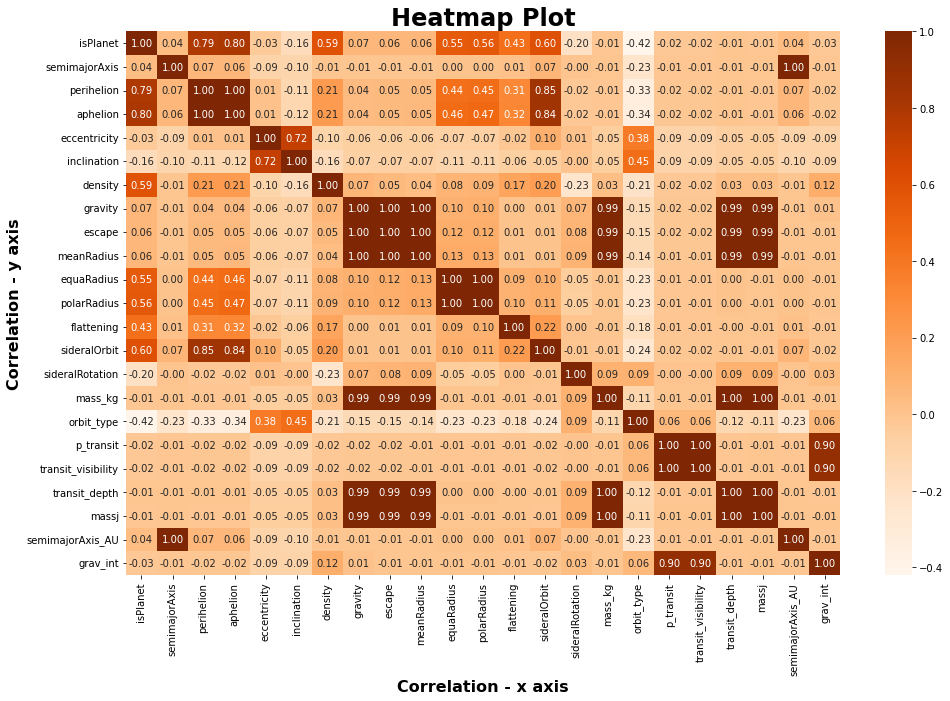

In [24]:
# Get the correlation from the corr method.
corr = df.corr()

# Specify the width and height of the plot.
plt.figure(figsize = (16, 10))

# Create a 'heatmap' plot.
sns.heatmap(corr, annot = True, cmap = "Oranges", fmt = ".2f")

# Name the labels of the x, y axes.
plt.xlabel("Correlation - x axis", fontsize = 16, fontweight = "bold")
plt.ylabel("Correlation - y axis", fontsize = 16, fontweight = "bold")

# Give the plot a title.
plt.title("Heatmap Plot", fontsize = 24, fontweight = "bold")

In [25]:
# Show the correlation row of isPlanet.
df.corr()[["isPlanet"]]

,isPlanet
isPlanet,1.000000
semimajorAxis,0.037617
perihelion,0.792468
aphelion,0.802667
eccentricity,-0.032432
inclination,-0.161852
density,0.593169
gravity,0.068184
escape,0.063163
meanRadius,0.062771


In [26]:
# Sort the values by a descending order.
df.corr()[["isPlanet"]].sort_values("isPlanet", ascending = False)

,isPlanet
isPlanet,1.000000
aphelion,0.802667
perihelion,0.792468
sideralOrbit,0.602071
density,0.593169
polarRadius,0.558597
equaRadius,0.549489
flattening,0.434729
gravity,0.068184
escape,0.063163


----
## <span style="color:DarkOrange">Prepare Train and Test Data</span>
---

In [27]:
# Drop all rows that include a infinite value.
df = df.replace([np.inf, -np.inf], np.nan).dropna()

In [28]:
# Get the shape of the matrix.
X = df.drop(['isPlanet'], axis = 'columns').to_numpy()
y = df['isPlanet'].to_numpy()

# Print the shape of the matrix in the start.
print(f"{GREEN}[START]: {WHITE}{X.shape}; ({y.shape[0]}, 0)")

# Train and test the algorithm.
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size = 0.2, random_state = 41)

# Print the train and test matrix shapes.
print(f"{GREEN}[TRAIN]: {WHITE}{X_train.shape}; ({y_train.shape[0]}, 0)")
print(f"{GREEN}[TEST]: {WHITE}{X_test.shape}; ({y_test.shape[0]}, 0)")

[START]: (262, 22); (262, 0)
[TRAIN]: (53, 22); (53, 0)
[TEST]: (209, 22); (209, 0)


In [29]:
# Transform features by scaling each feature to a given range (0 to 1).
scaler = MinMaxScaler()

# Print the maximum and minimum values of each feature.
print(f"{GREEN}[MAX]: {WHITE}{X_train.max()}")
print(f"{RED}[MIN]: {WHITE}{X_train.min()}")

# Fit and transform.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Everything has been scaled from 0 to 1.
print(f"{GREEN}[MAX]: {WHITE}{X_train.max()}")
print(f"{RED}[MIN]: {WHITE}{X_train.min()}")

[MAX]: 6.666188450185605e+25
[MIN]: -1283.4
[MAX]: 1.0000000000000002
[MIN]: 0.0


----
## <span style="color:DarkOrange">Training & Evaluation</span>
---

<span style="color:DarkOrange">KNN:</span>

In [30]:
# Score test:
for k in range(3, 20, 4):
    # Implement classification based on the nearest k neighbors.
    knn = KNeighborsClassifier(n_neighbors = k)

    # Send the train data to the fit function.
    knn.fit(X_train, y_train)

    # Get the score
    score = knn.score(X_test, y_test)

    # Print the score for the k value.
    print(f"{GREEN}[SCORE FOR K = {k}]: {WHITE}{score}")

[SCORE FOR K = 3]: 0.937799043062201
[SCORE FOR K = 7]: 0.937799043062201
[SCORE FOR K = 11]: 0.937799043062201
[SCORE FOR K = 15]: 0.937799043062201
[SCORE FOR K = 19]: 0.937799043062201


In [31]:
# Take the best score for the smallet possible k value.
best_k = 3

# Implement classification based on the nearest k neighbors.
knn = KNeighborsClassifier(n_neighbors = best_k)

# Send the train data to the fit function.
knn.fit(X_train, y_train)

# Get the score
score = knn.score(X_test, y_test)

# Print the score for the k value.
print(f"{GREEN}[SCORE FOR K = {best_k}]: {WHITE}{score}")

[SCORE FOR K = 3]: 0.937799043062201


Text(0.5, 1.0, 'KNN - Confusion Matrix')

<Figure size 720x432 with 0 Axes>

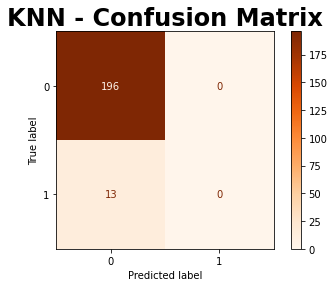

In [32]:
# Specify the width and height of the plot.
plt.figure(figsize = (10, 6))

# Create a confusion matrix.
metrics.ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, values_format = "d", cmap = 'Oranges')

# Give the plot a title.
plt.title("KNN - Confusion Matrix", fontsize = 24, fontweight = "bold")

In [33]:
# Show the classification report.
knn_predict = knn.predict(X_test)
print(metrics.classification_report(y_test, knn_predict, digits = 4))

              precision    recall  f1-score   support

           0     0.9378    1.0000    0.9679       196
           1     0.0000    0.0000    0.0000        13

    accuracy                         0.9378       209
   macro avg     0.4689    0.5000    0.4840       209
weighted avg     0.8795    0.9378    0.9077       209



C:\Users\wsaq2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wsaq2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wsaq2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: Unde

<span style="color:DarkOrange">SVM:</span>

In [34]:
# Create a linear line that seperates planets from not planets.
svm = SVC(kernel = "linear", C = 1)

# Send the train data to the fit function.
svm.fit(X_test, y_test)

# Get the score
score = svm.score(X_train, y_train)

# Print the score for the linear kernel.
print(f"{GREEN}[SCORE FOR LINEAR KERNEL]: {WHITE}{score}")

[SCORE FOR LINEAR KERNEL]: 1.0


Text(0.5, 1.0, 'SVM - Confusion Matrix')

<Figure size 720x432 with 0 Axes>

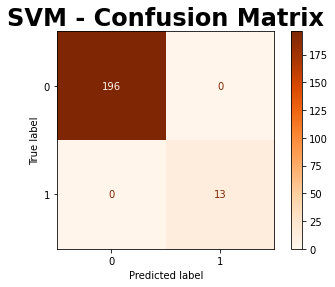

In [35]:
# Specify the width and height of the plot.
plt.figure(figsize = (10, 6))

# Create a confusion matrix.
metrics.ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test, values_format = "d", cmap = 'Oranges')

# Give the plot a title.
plt.title("SVM - Confusion Matrix", fontsize = 24, fontweight = "bold")

In [36]:
svm_predict = svm.predict(X_test)
print(metrics.classification_report(y_test, svm_predict, digits = 4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       196
           1     1.0000    1.0000    1.0000        13

    accuracy                         1.0000       209
   macro avg     1.0000    1.0000    1.0000       209
weighted avg     1.0000    1.0000    1.0000       209



In [37]:
print(f"{RED}KNN Accuracy: {WHITE}{float((metrics.accuracy_score(y_test, knn_predict) * 100))}%")
print(f"{GREEN}SVM Accuracy: {WHITE}{float((metrics.accuracy_score(y_test, svm_predict) * 100))}%")

KNN Accuracy: 93.77990430622009%
SVM Accuracy: 100.0%
